In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import scipy.integrate as SI
import warnings

warnings.filterwarnings('ignore')    #suppress warnings
plt.rcParams["figure.figsize"] = (12,2)

1. Solve **a linear oscillator** and write the code to estimate **the frequency of oscillation**. Verify your program for three values of $\omega$.

The frequency of oscillation is 1.0001250781738587


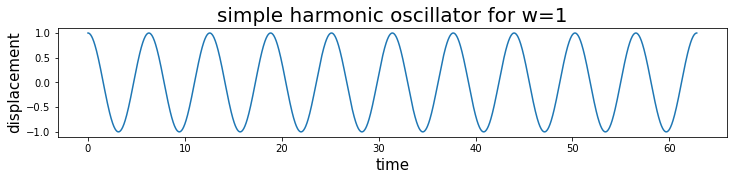

The frequency of oscillation is 2.0001111728738192


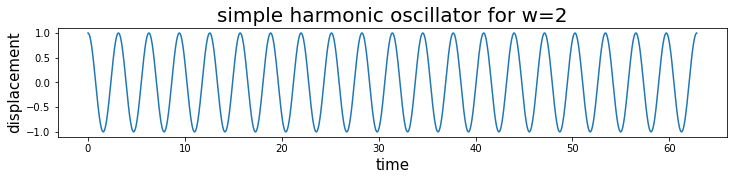

The frequency of oscillation is 3.00117962466488


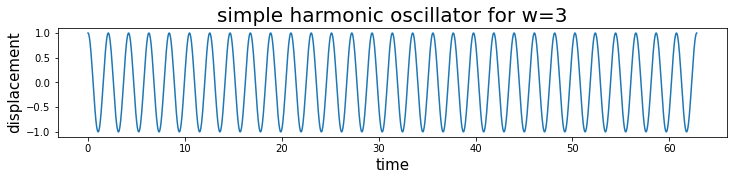

In [2]:
def F(X,t):
    x,v=X
    dx=v
    dv=-w**2*x
    return np.array([dx,dv])

W=[1,2,3]
for w in W:
    N=2000
    T=np.linspace(0,20*np.pi,N)
    X0=[1,0]
    Xs=odeint(F,X0,T)
    Xt=Xs[:,0]
    T1=[]
    for i in range(1,N-1):
        if Xt[i-1]<Xt[i]>Xt[i+1]:
                T1.append(T[i])   
    AvTP=np.average(np.diff(T1))
    f=2*np.pi/AvTP
    print('The frequency of oscillation is', f)
    plt.plot(T,Xt)
    plt.xlabel('time',fontsize=15)
    plt.ylabel('displacement',fontsize=15)
    plt.title('simple harmonic oscillator for w='+str(w),fontsize=20)
    plt.show()

2. use your above code to simulate **the frequency-amplitude diagram of a nonlinear oscillator**
$$\large m\frac{d^{2}x}{dt^{2}}+m\omega^{2}x^{p}=0 \text{ for p=1,3,7,9}$$ 

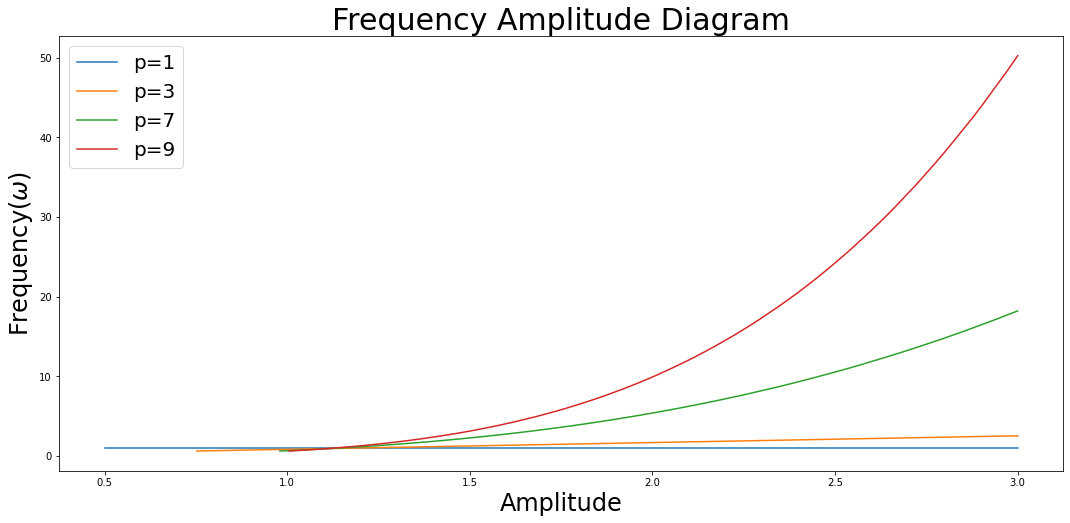

In [3]:
def f(X,t,k):
    x,v=X
    dx=v
    dv=-w**2*x**k
    return [dx,dv]
plt.rcParams["figure.figsize"] = (18,8)
p=[1,3,7,9]
w=1
H=1000
T=np.linspace(0,20,H)
A=np.linspace(0.5,3,100)

for i in p:
    W=[]
    for j in A:
        X0=[j,0]
        s=SI.odeint(f,X0,T,args=(i,))
        x=s[:,0]
        T1=[]
        for h in range(1,H-1):
            if x[h-1]<x[h]>x[h+1]:
                T1.append(T[h])
        Tp=np.mean(np.diff(T1))
        W.append(2*np.pi/Tp)
    plt.plot(A,W)
plt.title("Frequency Amplitude Diagram",size=30)
plt.ylabel("Frequency($\omega$)",size=24)
plt.xlabel("Amplitude",size=24)
plt.legend(['p=1','p=3','p=7','p=9'],fontsize=20)
plt.show()

### Comment :  
                   with the increase in non-linearty we are getting a more frequency dependent amplitude.

Q3. Study **a full amplitude pendulum**

$$\large m\frac{d^{2}x}{dt^{2}}+2mb\frac{dx}{dt}+m\omega^{2}\sin(x)=A\cos(\varOmega t)$$

   Take $m=1,b=0.25,A=\frac{2}{3},\omega=1,\varOmega=\frac{2}{3}$ and there after vary $A=[1.0,1.2]$

   a) plot $x-t$ in both the cases $ \\ $
   b) plot $x-v$ in both the cases $ \\ $

### Case i : For $ A=\frac{2}{3}$

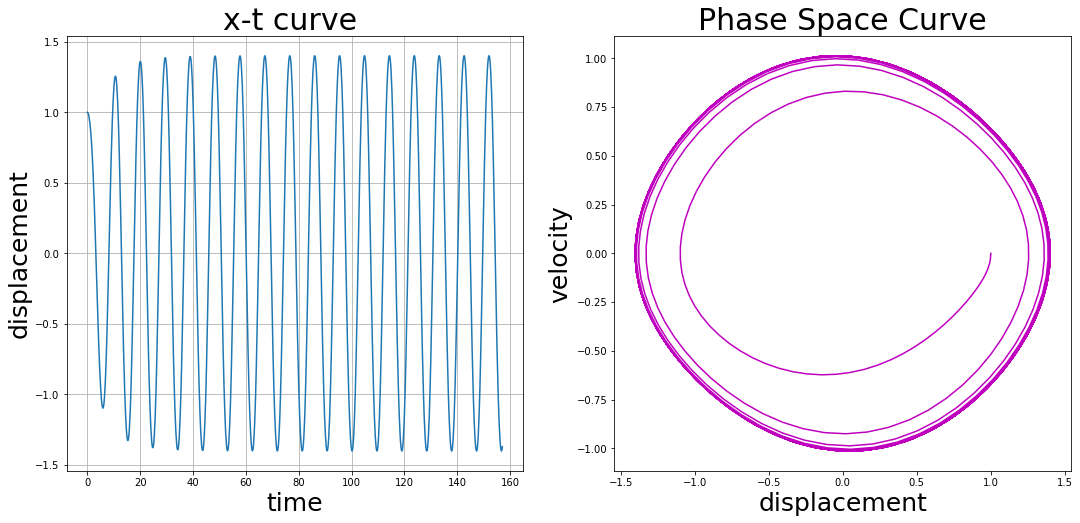

In [4]:
def F(X,t):
    x,v = X
    dx = v
    dv = -w**2*np.sin(x) - 2*b*v + A*np.cos(W*t)
    return np.array([dx,dv])

b,w,W,A = 0.25,1,(2/3),(2/3)    
T = np.linspace(0,50*np.pi/w,1000)
X0 = [1,0]
Xs1 = odeint(F,X0,T)
Xt,Vt = Xs1[:,0],Xs1[:,1]

plt.subplot(121)
plt.plot(T,Xt)
plt.grid()
plt.xlabel('time', size=25)
plt.ylabel('displacement', size=25)
plt.title('x-t curve ', size=30)

plt.subplot(122)
plt.plot(Xt,Vt,'m')
plt.ylabel('velocity', size=25)
plt.xlabel('displacement', size=25)
plt.title('Phase Space Curve', size=30)
plt.show()

### Case ii : For A=[1.0,1.2]

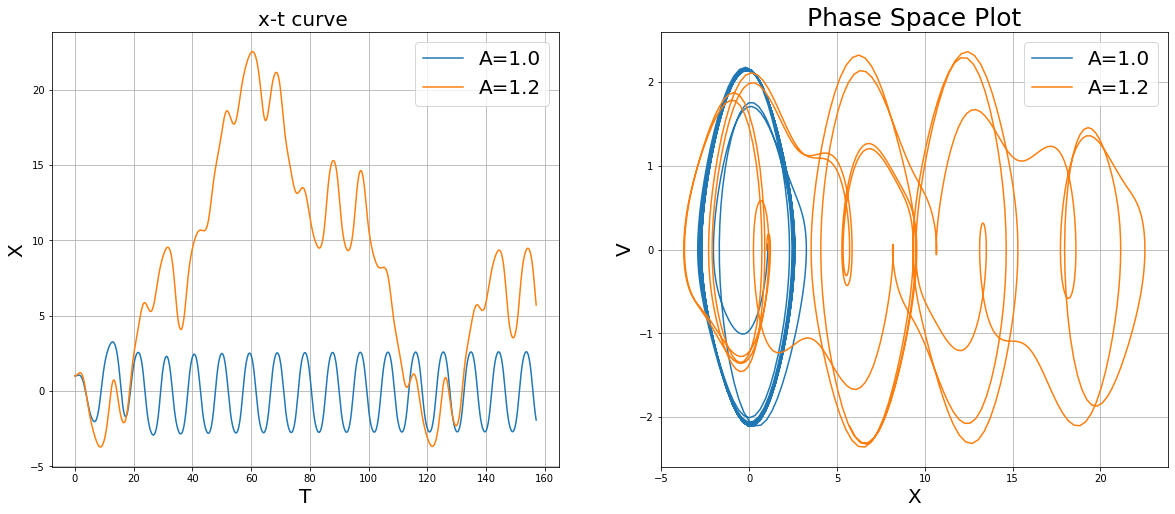

In [6]:
b,w,W=0.25,1,(2/3)
T=np.linspace(0,50*np.pi/w,1000)
a=[1,1.2]
X,V=[],[]

for i in a:   
    def F(X,t):
        x,v=X
        dx=v
        dv=-w**2*np.sin(x) -2*b*v +i*np.cos(W*t)
        return np.array([dx,dv])
    
    X0=[1,0]
    Xs1=odeint(F,X0,T)
    X.append(Xs1[:,0])
    V.append(Xs1[:,1])
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,8))    
ax2.plot(X[0],V[0],X[1],V[1])
ax2.legend(['A=1.0','A=1.2'],fontsize=20)
ax2.set_title("Phase Space Plot",size=25)
ax2.set_xlabel ("X",size=20)
ax2.set_ylabel ("V",size=20)
ax2.grid()
ax1.plot(T,X[0],T,X[1])
ax1.legend(['A=1.0','A=1.2'],fontsize=20)
ax1.set_title('x-t curve ',size=20)
ax1.set_xlabel ("T",size=20)
ax1.set_ylabel ("X",size=20)
ax1.grid()
plt.show()

 c) 
   use initial condition as (1,0) and (1.0001,0). $ \\ $
   Let the solutions of x in this two cases of initial conditions be $x_{1}$ and $x_{2}$.  $ \\ $
   Let $\Delta x=|x_{1}-x_{2}|$.  $ \\ $
   Plot $\Delta x-t$ curve for $ A=[1.0,1.2]$.

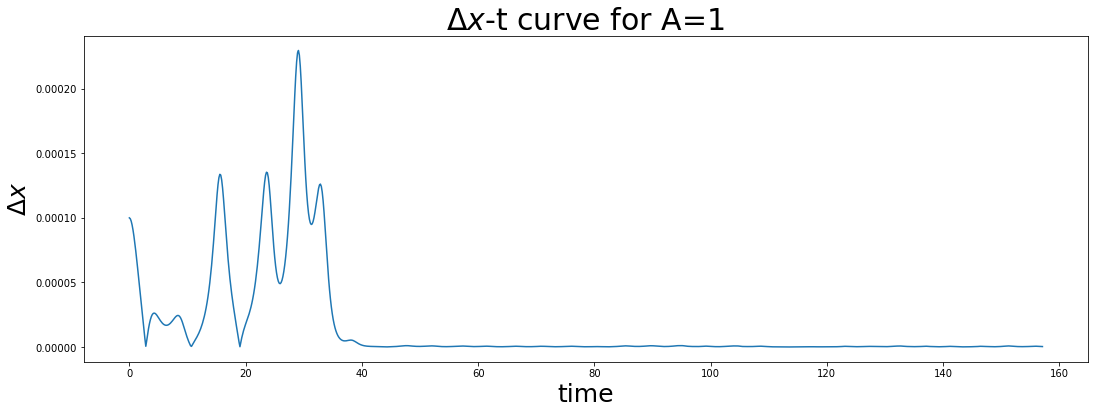

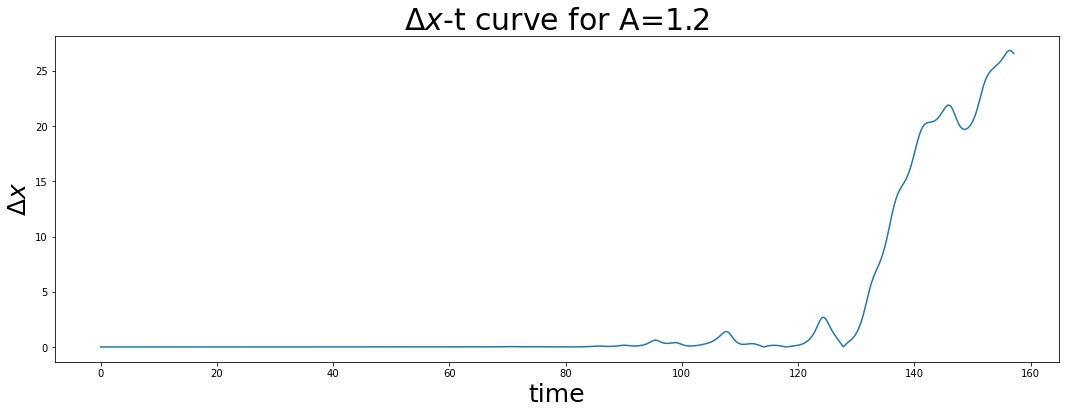

In [5]:
b,w,W=0.25,1,(2/3)
T=np.linspace(0,50*np.pi/w,1000)
a=[1,1.2]

for i in a:    
    def F(X,t):
        x,v=X
        dx=v
        dv=-w**2*np.sin(x) -2*b*v +i*np.cos(W*t)
        return np.array([dx,dv])  
    
    X0=[1.0001,0]
    Xs2=odeint(F,X0,T)
    Xt2,Vt2=Xs2[:,0],Xs2[:,1]
    X_0=[1,0]
    Xs1=odeint(F,X_0,T)
    Xt1,Vt1=Xs1[:,0],Xs1[:,1]
    delx=np.abs(Xt1-Xt2)
    plt.subplots(figsize=(18,6))
    plt.plot(T,delx)
    plt.ylabel('$\Delta x$',size=25)
    plt.xlabel('time',size=25)
    plt.title('$\Delta x$-t curve for A='+str(i),size=30)
    plt.show()

 3.d) Put comments on your observations in (a)-(c).

#### Comment : 
    In nonlinear oscillator the phase-space plot shifts from ellipse and also we get frequancy dependent amplitude.